<h1> Connect to Database <h1>

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
from dotenv import load_dotenv
import os

load_dotenv('pwd.env')

db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv("DB_HOST")

In [4]:
username = db_user
password = db_password
host = db_host
port = '5433'
database = 'House_Power_DWH'

connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

try:
    with engine.connect() as connection:
        print("connection was successful!")
except Exception as e:
    print("connectionfailed:",e)

connection was successful!


<h1> Read From Database <h1>

In [96]:
house_power= pd.read_sql(
    '''
    SELECT * from "fact_energy_usage"
    ''', engine
)
house_power

,Index,Global_active_power KW,Global_reactive_power KW,Apparent_power_KVA,Sub_metering_1 J,Sub_metering_2 J,Sub_metering_3 J,Voltage V,Global_intensity A,Date,Time
0,1,4.216,0.418,4.236671,0,1,17,234.84,18.4,16/12/2006,17:24:00
1,2,5.360,0.436,5.377704,0,1,16,233.63,23.0,16/12/2006,17:25:00
2,3,5.374,0.498,5.397025,0,2,17,233.29,23.0,16/12/2006,17:26:00
3,4,5.388,0.502,5.411335,0,1,17,233.74,23.0,16/12/2006,17:27:00
4,5,3.666,0.528,3.703828,0,1,17,235.68,15.8,16/12/2006,17:28:00
...,...,...,...,...,...,...,...,...,...,...,...
13351,13352,0.404,0.000,0.404000,0,0,0,244.58,1.8,2008-09-01,23:55:00
13352,13353,0.402,0.000,0.402000,0,0,0,243.69,1.8,2008-09-01,23:56:00
13353,13354,0.402,0.000,0.402000,0,0,0,244.06,1.8,2008-09-01,23:57:00
13354,13355,0.402,0.000,0.402000,0,0,0,244.27,1.8,2008-09-01,23:58:00


<h1> Pre-processing <h1>

In [97]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
scaler = MinMaxScaler()

house_power[['Sub_metering_2 J', 'Sub_metering_3 J' ,'Apparent_power_KVA','Voltage V','Global_intensity A']] = scaler.fit_transform(
    house_power[['Sub_metering_2 J', 'Sub_metering_3 J','Apparent_power_KVA','Voltage V','Global_intensity A']]
)
print(house_power)

       Global_active_power KW  Global_reactive_power KW  Apparent_power_KVA  \
0                       4.216                     0.418            0.523278   
1                       5.360                     0.436            0.670971   
2                       5.374                     0.498            0.673472   
3                       5.388                     0.502            0.675324   
4                       3.666                     0.528            0.454307   
...                       ...                       ...                 ...   
13351                   0.404                     0.000            0.027182   
13352                   0.402                     0.000            0.026923   
13353                   0.402                     0.000            0.026923   
13354                   0.402                     0.000            0.026923   
13355                   0.404                     0.000            0.027182   

       Sub_metering_1 J  Sub_metering_2 J  Sub_mete

In [240]:
house_power.dtypes

Global_active_power KW      float64
Global_reactive_power KW    float64
Apparent_power_KVA          float64
Sub_metering_1 J              int64
Sub_metering_2 J            float64
Sub_metering_3 J            float64
Voltage V                   float64
Global_intensity A          float64
dtype: object

In [ ]:
house_power=house_power.drop(['Date' ,'Time', 'Index'] ,axis=1)

<h2>Visualization</h2>

<h3>1.How the 'Global_active_power KW' and the Global_reactive_power KW changes over time</h3>

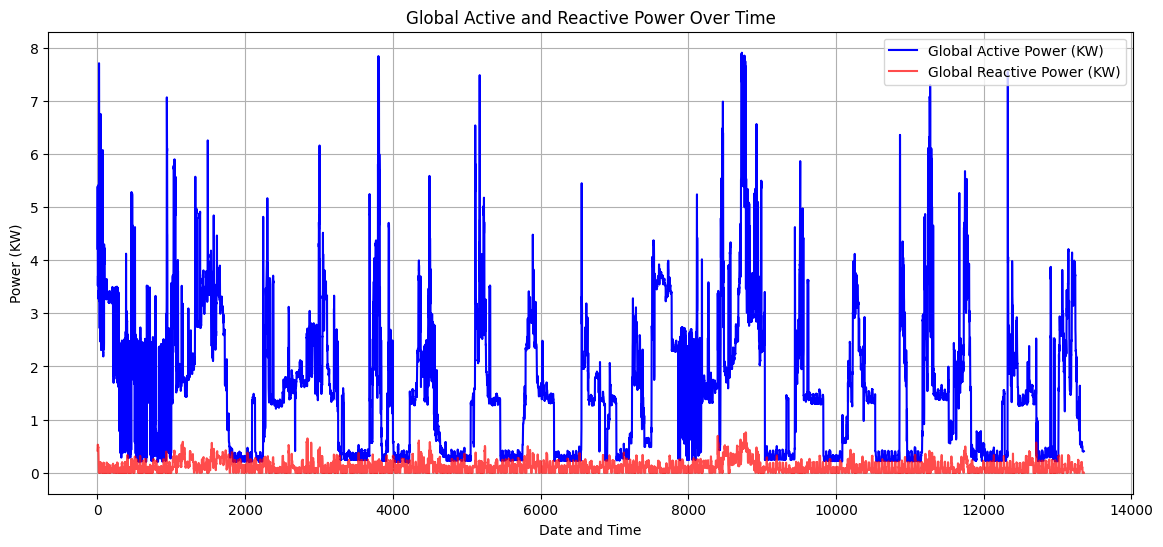

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(house_power['Global_active_power KW'], label='Global Active Power (KW)', color='blue')
plt.plot(house_power['Global_reactive_power KW'], label='Global Reactive Power (KW)', color='red', alpha=0.7)
plt.title('Global Active and Reactive Power Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Power (KW)')
plt.legend()
plt.grid()
plt.show()

<h4>2.The distribution of 'Global_active_power KW'
</h4>

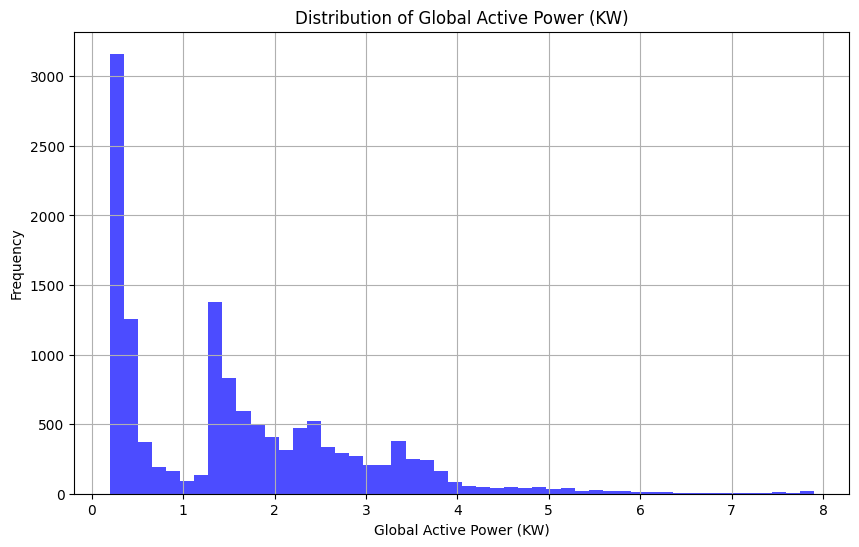

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(house_power['Global_active_power KW'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Global Active Power (KW)')
plt.xlabel('Global Active Power (KW)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<h4>3.outliers in the 'Global_active_power KW'</h4>

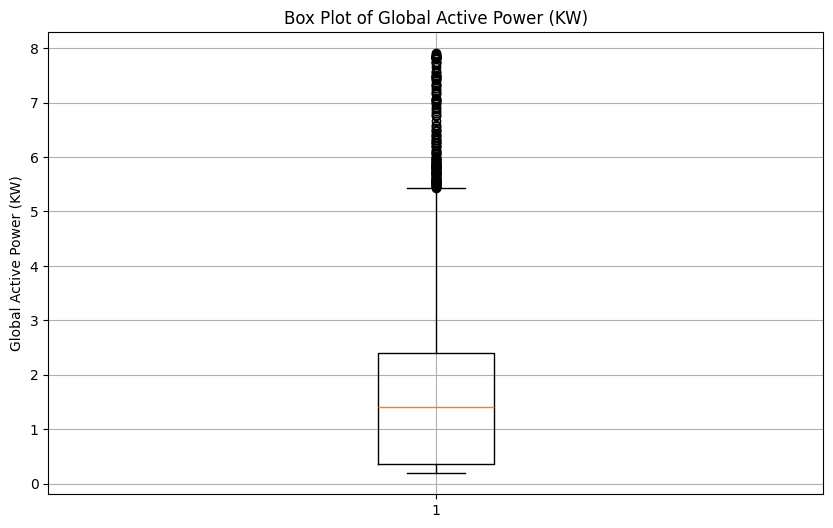

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(house_power['Global_active_power KW'])
plt.title('Box Plot of Global Active Power (KW)')
plt.ylabel('Global Active Power (KW)')
plt.grid()
plt.show()

<h4>4.The relationship between 'Global_active_power KW' and 'Global_reactive_power KW'</h4>

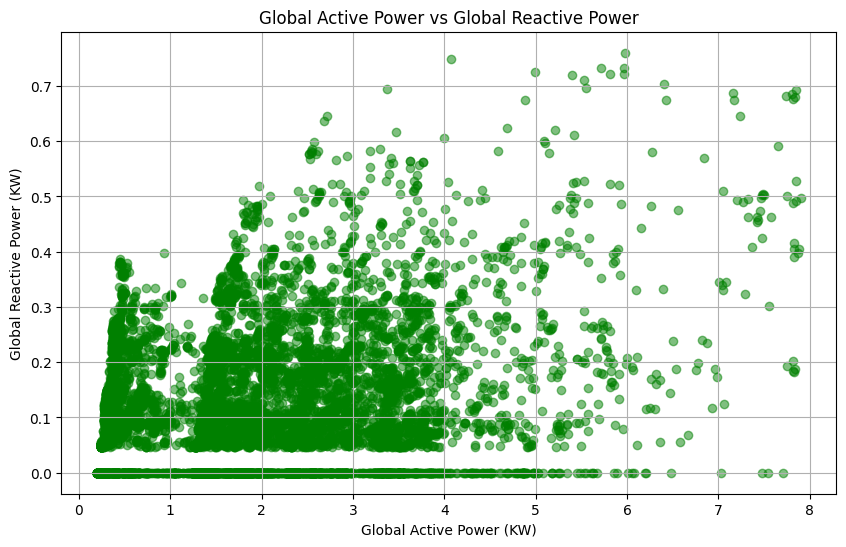

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(house_power['Global_active_power KW'], house_power['Global_reactive_power KW'], alpha=0.5, color='green')
plt.title('Global Active Power vs Global Reactive Power')
plt.xlabel('Global Active Power (KW)')
plt.ylabel('Global Reactive Power (KW)')
plt.grid()
plt.show()

<h4>5.How each sub-meter contributes to the overall power consumption over time.</h4>

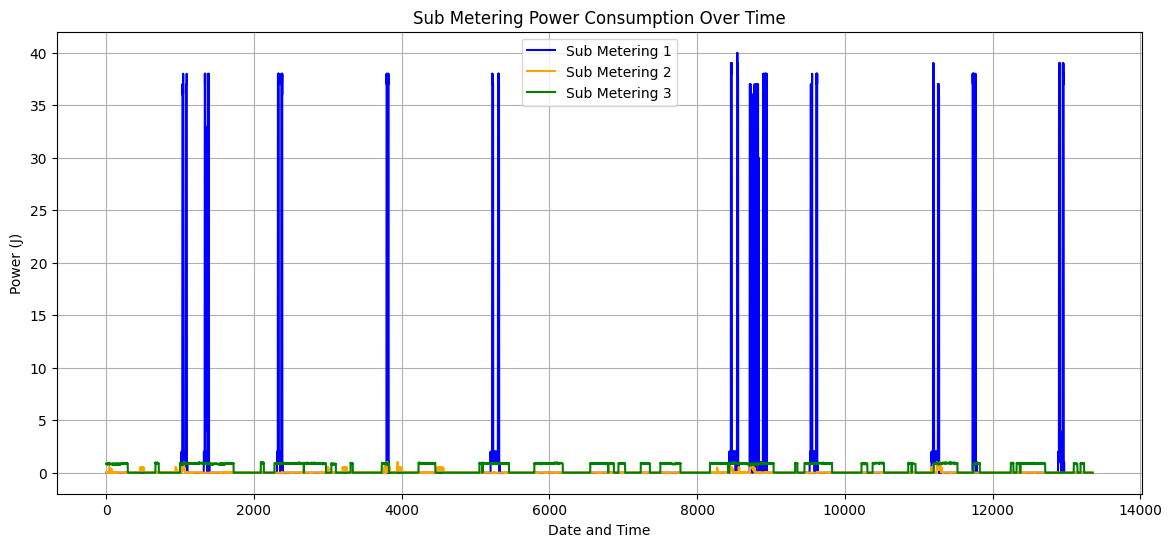

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(house_power['Sub_metering_1 J'], label='Sub Metering 1', color='blue')
plt.plot(house_power['Sub_metering_2 J'], label='Sub Metering 2', color='orange')
plt.plot(house_power['Sub_metering_3 J'], label='Sub Metering 3', color='green')
plt.title('Sub Metering Power Consumption Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Power (J)')
plt.legend()
plt.grid()
plt.show()

<h4>6.The correlation between all numeric variables</h4>

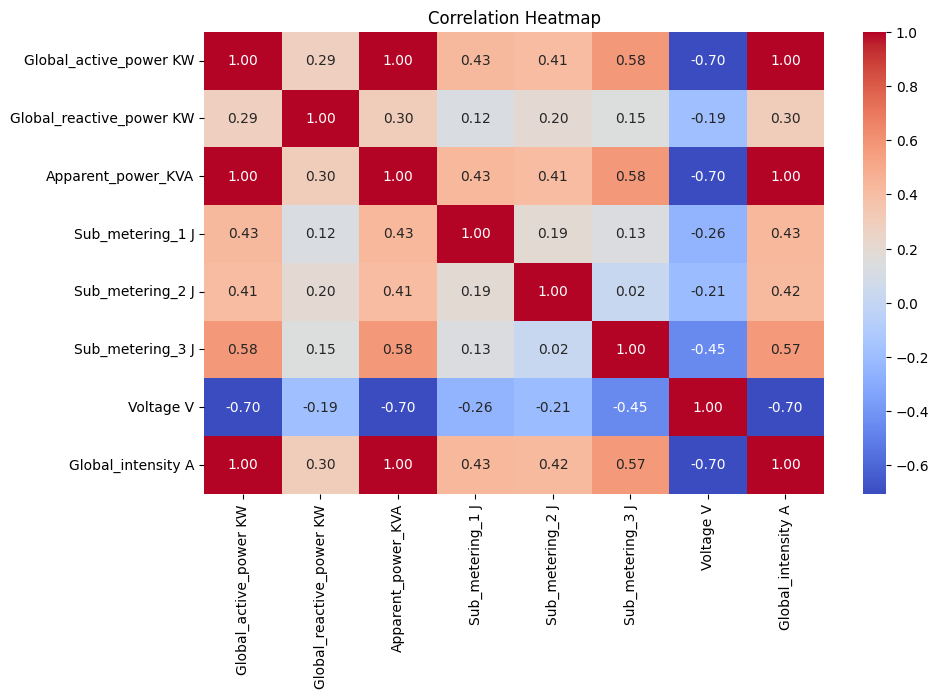

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
correlation_matrix = house_power[['Global_active_power KW', 'Global_reactive_power KW', 
                            'Apparent_power_KVA', 'Sub_metering_1 J', 
                            'Sub_metering_2 J', 'Sub_metering_3 J', 
                            'Voltage V', 'Global_intensity A']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h1> Ml Model <h1>

In [243]:
from sklearn.model_selection import train_test_split

X = house_power.drop('Global_active_power KW', axis=1)
y = house_power['Global_active_power KW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [244]:
X_test

,Global_reactive_power KW,Apparent_power_KVA,Sub_metering_1 J,Sub_metering_2 J,Sub_metering_3 J,Voltage V,Global_intensity A
1783,0.278,0.056279,0,0.000000,0.00,0.841335,0.047337
7592,0.226,0.454446,0,0.027397,0.90,0.618198,0.426036
10872,0.000,0.472710,0,0.000000,0.85,0.582076,0.455621
1978,0.048,0.006569,0,0.000000,0.00,0.871513,0.005917
1085,0.250,0.470919,37,0.000000,0.85,0.319616,0.455621
...,...,...,...,...,...,...,...
2094,0.000,0.150666,0,0.000000,1.00,0.843621,0.136095
11243,0.252,0.326407,1,0.136986,0.85,0.535894,0.325444
2380,0.292,0.454526,37,0.013699,0.85,0.382259,0.437870
3646,0.000,0.006213,0,0.000000,0.00,0.690901,0.005917


In [245]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_reg=LinearRegression()
linear_reg.fit(X_train, y_train)


linear_reg_predictions = linear_reg.predict(X_test)

r2 = r2_score(y_test, linear_reg_predictions)

print(f'(R-squared): {r2}')

mse = mean_squared_error(y_test, linear_reg_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

(R-squared): 0.9999484849669723
Mean Squared Error (MSE): 0.0001


In [246]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_reg, X_test, y_test, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {scores}")
print(f"Mean R-squared score: {scores.mean():.4f}")


Cross-validated R-squared scores: [0.99994335 0.99995622 0.99995089 0.99994773 0.9999432 ]
Mean R-squared score: 0.9999
